In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys; sys.path.append('..')
import fastai_scans
from fastai.basics import *

path = Path('../../../data/brats/preprocess/train')

In [2]:
bs = 4
vol_size = (128,128,128)
patch_size = (64,64,64)

# Classification

In [3]:
data = (fastai_scans.VolumeItemList.from_paths(path/'data', path/'metadata.csv')
                                   .filter_na_lbls(col_name='label') # In brats not all subjects have a label
                                   .split_by_rand_pct(0.2, seed=7)
                                   .label_from_metadata(col_name='label')
                                   .transform(fastai_scans.get_transforms())
                                   .databunch(bs=8)
                                   .normalize())

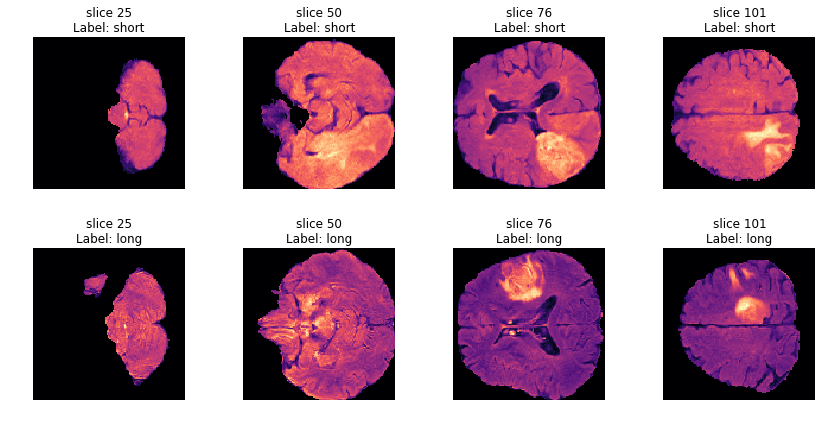

In [4]:
data.show_batch(2)

# Regression

In [5]:
data = (fastai_scans.VolumeItemList.from_paths(path/'data', path/'metadata.csv')
                                   .filter_na_lbls(col_name='surv') # In brats not all subjects have a label
                                   .split_by_rand_pct(0.2, seed=7)
                                   .label_from_metadata(col_name='surv')
                                   .transform(fastai_scans.get_transforms())
                                   .databunch(bs=8)
                                   .normalize())

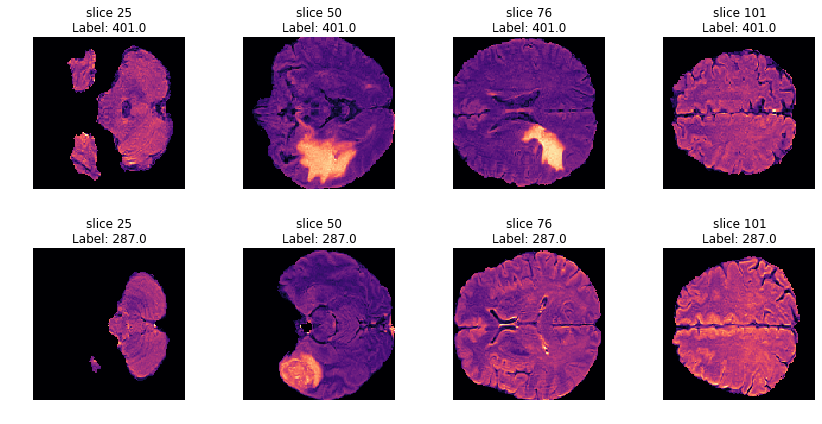

In [6]:
data.show_batch(2, y_scale=1800) # I have divided the outpus by 1800 to normalize the outputs.
                                 # To show the correct scale in the plots use `y_scale`.

# Segmentation

In [7]:
data = (fastai_scans.SegmentationItemList.from_paths(path/'data', path/'labels')
                                         .split_by_rand_pct(0.2, seed=7)
                                         .label_from_bcolz()
                                         .transform(fastai_scans.get_transforms(do_crop=True, max_zoom=1.3),
                                                    size=patch_size, tfm_y=True)
                                         .databunch(bs=bs)
                                         .normalize())

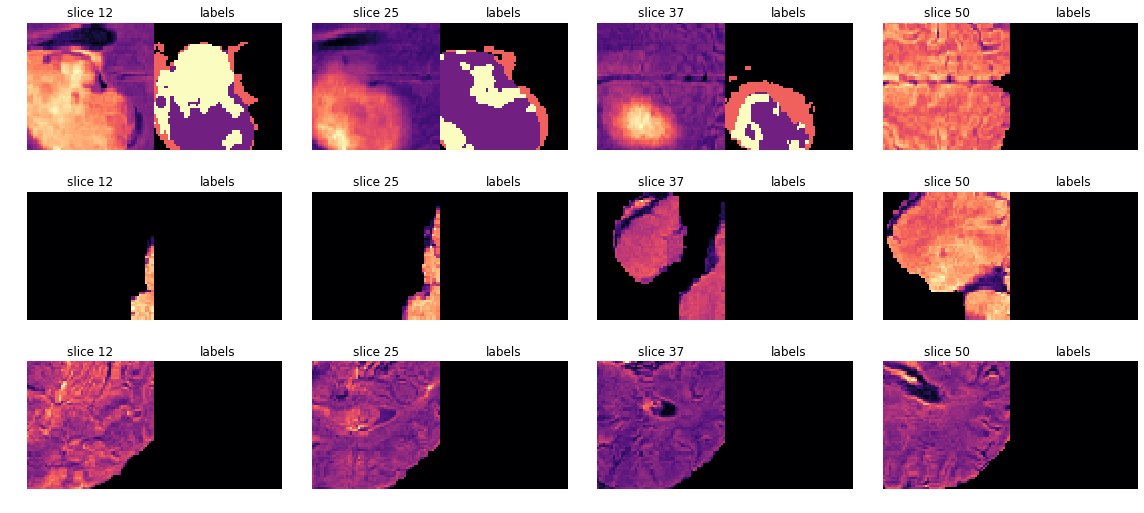

In [8]:
data.show_batch(3)

# Parallel tasks

In [9]:
data = (fastai_scans.ParallelItemList.from_paths(path/'data', path/'labels', path/'metadata.csv')
                                     .filter_na_lbls(col_name='label') # In brats not all subjects have a label
                                     .split_by_rand_pct(0.2, seed=7)
                                     .label_from_bcolz(col_name='label')
                                     .transform(fastai_scans.get_transforms(max_zoom=1.2), tfm_y=True)
                                     .databunch(bs=bs)
                                     .normalize())

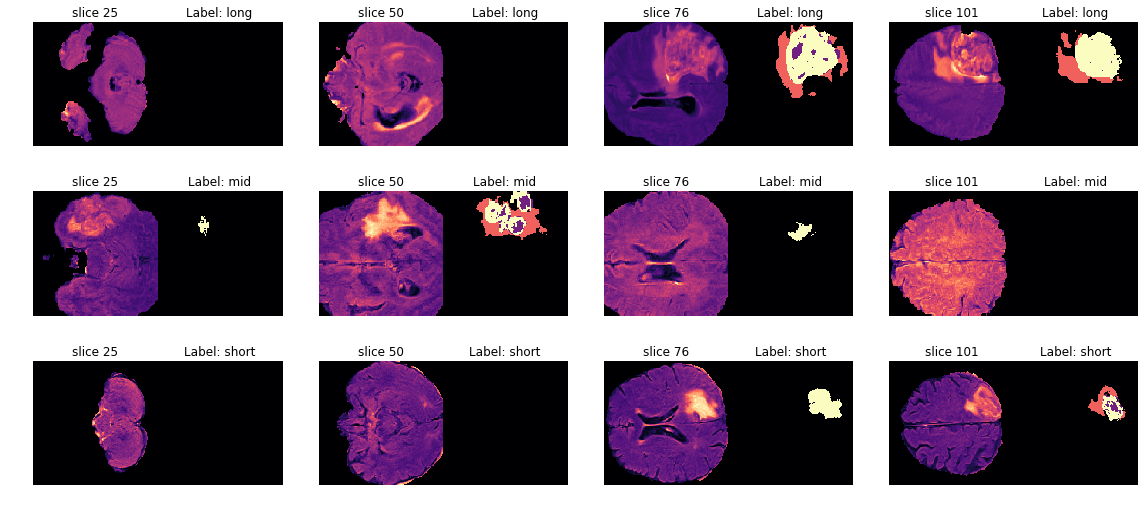

In [10]:
data.show_batch(3)